$\hspace{98mm}$ ***ΥΣ11 Τεχνικές Εξόρυξης Δεδομένων: 1η Εργασία***
$ $

$\hspace{105mm}$ ***Παναγιώτα Γύφτου, Α.Μ 1115201900318***
$ $

$\hspace{130mm}$ ***Απρίλιος 2023*** 

$ $



In [79]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns

import matplotlib 
%matplotlib inline 

from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from google.colab import drive
drive.mount('/content/drive')

from datetime import date, timedelta, datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Επιβεβαιώστε ότι έχει γίνει σωστά η εισαγωγή τρέχοντας το τρέχον κελί.
# Η έξοδος του κελιού πρέπει να είναι της μορφής:
# Python version 3.X.X (default, MM DD YYYY, HH:MM:SS)
# Matplotlib version 3.X.X
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Pandas version 1.5.3
Matplotlib version 3.7.1


###Διάβασμα .csv αρχείου και ανάκτηση δεδομένων σε μορφή dataframe

In [81]:
myFile ="/content/drive/MyDrive/DataTede2023/marketing_campaign.csv"
df = pd.read_csv(myFile, sep='\t')      # save without tabs!

###Ερώτημα 1: Προεπεξεργασία/Καθάρισμα

In [82]:
print(f"Check for missing values\n: {df.isnull().sum()}")

# Το μέγεθος της σχέσης df πριν τις αλλαγές
rows, columns = df.shape
print(f"The size of the dataframe before the changes: \n(Rows: {rows} , Columns: {columns})\n") 

# Διαγραφή πλειάδων που έχουν ελλιπή δεδομένα
df = df.dropna()

# Το μέγεθος της σχέσης df μετά τις αλλαγές
rows, columns = df.shape
print(f"The size of the dataframe after the changes: \n(Rows: {rows} , Columns: {columns})\n") 

# Οι τύποι δεδομέων πριν τις αλλαγές
print('The data types before changes:')
print(df.info())

# Μετατροπή τύπων δεδομένων -που αναφέρονται σε ημερομηνίες- σε DateTime objects
# μόνο το χαρακτηριστικό Dt_Customer αναφέρεται σε ημερομηνίες
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Οι τύποι δεδομέων μετά τις αλλαγές
print('\nThe data types after changes:')
print(df.info())

print(f"Check for missing values\n: {df.isnull().sum()}")


Check for missing values
: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
The size of the dataframe before the changes: 
(Rows: 2240 , Columns: 29)

The size of the dataframe after the changes: 
(Rows: 2216 , Columns: 29)

The data types before changes:
<class 'pandas.core.frame.

<ipython-input-82-52e9d41695e2>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
<ipython-input-82-52e9d41695e2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


###Ερώτημα 2: Αντικατάσταση τιμών με μία τιμή και εκτύπωση πλήθος στοιχείων κάθε κατηγορίας

$ $



*   Αντικατάσταση τιμών με μία τιμή




In [83]:
# Εκτύπωση των μοναδικών τιμών των κατηγορικών χαρακτηριστικών Marital_Status και Education
print(f"The unique elements of the 'Marital_Status' attribute are:\n {df['Marital_Status'].unique()}")
print(f"\nThe unique elements of the 'Education' attribute are:\n {df['Education'].unique()}\n")

# Αντικατάσταση των τιμών 'Alone', 'Absurd', 'YOLO' του χαρακτηριστικού Marital_Status 
# με την τιμή ‘Single’
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd','Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO','Single')

# Εκτύπωση των μοναδικών τιμών του χαρακτηριστικού Marital_Status μετά την τροποποίηση των τιμών
print(f"The unique elements of the 'Marital_Status' attribute after the changes are:\n {df['Marital_Status'].unique()}")

The unique elements of the 'Marital_Status' attribute are:
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

The unique elements of the 'Education' attribute are:
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

The unique elements of the 'Marital_Status' attribute after the changes are:
 ['Single' 'Together' 'Married' 'Divorced' 'Widow']



$ $

*   Γραφήματα των 'Marital_Status' και 'Education'.


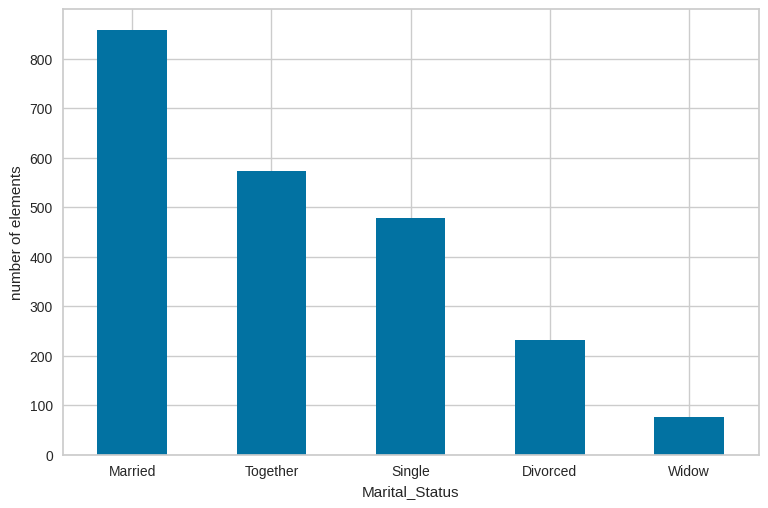

In [84]:
# --- 'Marital_Status' graph ---
percentages = df.value_counts('Marital_Status')    # count how many are: 'Single', 'Together', 'Married', 'Divorced', 'Widow'

percentages.plot.bar(x='Marital_Status',rot=0)     # print the graph
plt.ylabel('number of elements')
print('')

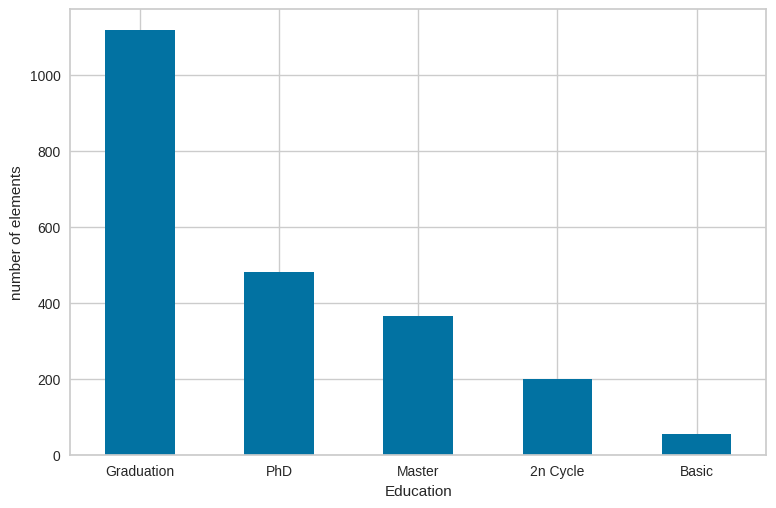

In [85]:
# --- 'Education' graph ---
percentages = df.value_counts('Education')    # count how many are: 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'

percentages.plot.bar(x='Education',rot=0)     # print the graph
plt.ylabel('number of elements')
print('')

###Ερώτημα 3: Δημιουργία νέων χαρακτηριστικών

**Α.**  $ \ \ $  **("Customer_For")**

In [86]:
# Εύρεση της τρέχουσας ημερομηνίας
today = date.today()

# Δημιουργία χαρακτηριστικού για την τρέχουσα ημερομηνία (προσθέτω σε όλες τις πλειάδες την πληροφορία της τρέχουσας ημερομηνίας)
df['Current_Day'] = today


# Μετατέπουμε τις ακέραιες τιμές που εκφράζουν το πλήθος των 'ημερών' που έχουν περάσει από την τελευταία αγορα που έκανε ο πελάτης σε μέρες 
# και τις αφαιρούμε από την τρέχουσα ημέρα ώστε να λάβουμε την ημερομηνία της τελευταίας αγοράς.
# Η πληροφορία της ζητούμενης ημερομηνίας εκχωρείται στην νέα στήλη 'Last_Purchase_Date'. 
df['Last_Purchase_Date'] = df['Current_Day'] - pd.to_timedelta(df['Recency'], unit='D')

# Μετατρέπουμε το νέο χαρακτηριστικό από τύπο δεδομένων object σε DateTime objects, ώστε να μπορούμε να κάνουμε την τελική πράξη της εύρεσης
# των ημερών που είχαν περάσει από την πρώτη μέρα αγορών μέχρι και την τελική.
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])
df['Customer_For'] = df['Last_Purchase_Date'] - df['Dt_Customer']

# Καθαρίζουμε τον πίνακα, διαγράφοντας τις μη χρήσιμες πλέον στήλες
del df['Last_Purchase_Date']
del df['Current_Day']

# Εκτύπωση του ανανεωμένου πίνακα!
df


<ipython-input-86-4c9a269287da>:11: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df['Last_Purchase_Date'] = df['Current_Day'] - pd.to_timedelta(df['Recency'], unit='D')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,3982 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,3156 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,3515 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,3108 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,3296 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,3564 days
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,3074 days
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,3293 days
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,3377 days


$ $

**Β.**  $ \ \ $  **("Age")** 

In [87]:
# Ευρεση του τρέχοντος έτους
current_year = datetime.now().year

# Δημιουργία χαρακτηριστικού για το τρέχον έτος (προσθέτω σε όλες τις πλειάδες την πληροφορία)
df['Current_Year'] = current_year

# εύρεσης της ηλικίας.
df['Age'] = df['Current_Year'] - df['Year_Birth']

# Καθαρίζουμε τον πίνακα, διαγράφοντας τις μη χρήσιμες πλέον στήλες
del df['Current_Year']

# Εκτύπωση του ανανεωμένου πίνακα!
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,3982 days,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,3156 days,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,3515 days,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,3108 days,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,3296 days,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,3564 days,56
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,3074 days,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,3293 days,42
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,3377 days,67


$ $

**Γ.**  $ \ \ $  **("Spent")** 

In [88]:
# Προσθέτουμε τα ποσά που ξόδεψε ο πελάτης σε κάθε κατηγορία σε διάστημα δύο ετών.
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Εκτύπωση του ανανεωμένου πίνακα!
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,3982 days,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,3156 days,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,3515 days,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,3108 days,39,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,3296 days,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,3564 days,56,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,3,11,0,3074 days,77,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,3293 days,42,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,3377 days,67,843


$ $

**Δ.**  $ \ \ $  **("Παιδιά")** 

In [89]:
# Προσθέτουμε το πλήθος των παιδιών και των εφήβων 
df['Παιδιά'] = df['Kidhome'] + df['Teenhome']

# Εκτύπωση του ανανεωμένου πίνακα!
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,3982 days,66,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,3156 days,69,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,3515 days,58,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,3108 days,39,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,3296 days,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,3564 days,56,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,1,0,0,3,11,0,3074 days,77,444,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,3293 days,42,1241,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,3377 days,67,843,1


$ $

**Ε.**  $ \ \ $  **("Family_Size")** 

In [90]:
# Η συνάρτηση CalcNumOfPeople_InA_House(), σκόπος της είναι να επιστρέφει τον αριθμό των ατόμων σε μία οικογένεια 
def CalcNumOfPeople_InA_House(chilidren, marital_status) :
  """
    if the customer is 'Married' or 'Together' -- then -->> adding an extra person with the number of children and the customer
    else return the number of children and the customer
  """

  if marital_status == 'Together' or  marital_status == 'Married':
    total = chilidren + 2
  else:
    total = chilidren + 1

  return total

# Για τον υπολογισμό του στοιχείου 'Family_Size' κάθε πλειάδας εφαρμόζουμε τη συνάρτηση CalcNumOfPeople_InA_House
df['Family_Size'] = df.apply(lambda row: CalcNumOfPeople_InA_House(row['Παιδιά'],row['Marital_Status']), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,3982 days,66,1617,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,3156 days,69,27,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,3515 days,58,776,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,3108 days,39,53,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,3296 days,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,3564 days,56,1341,1,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,3074 days,77,444,3,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,3293 days,42,1241,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,3377 days,67,843,1,3


$ $

**Στ.**  $ \ \ $  **("Is_Parent" )** 

In [91]:
# Η συνάρτηση FindIfCustomerIsParent() , επιστρέφει αν ο πελάτης έχει παιδιά.
def FindIfCustomerIsParent(chilidren):
  """
    if the number of children is greater than zero -- then -->> return 'Yes'
    else return 'No'
  """

  if chilidren > 0: return 'Yes'
  else: return 'No'

# Για την εύρεση του στοιχείου 'Is_Parent' κάθε πλειάδας εφαρμόζουμε τη συνάρτηση FindIfCustomerIsParent
df['Is_Parent'] = df.apply(lambda row: FindIfCustomerIsParent(row['Παιδιά']), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,3982 days,66,1617,0,1,No
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,3156 days,69,27,2,3,Yes
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,3515 days,58,776,0,2,No
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,3108 days,39,53,1,3,Yes
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,3296 days,42,422,1,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,3564 days,56,1341,1,3,Yes
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,3074 days,77,444,3,5,Yes
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,3293 days,42,1241,0,1,No
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,3377 days,67,843,1,3,Yes


$ $

**Ζ.**  $ \ \ $  **("Living_With" )** 

In [92]:
# Η συνάρτηση Cohabitation() επιστρέφει αν ο πελάτης συγκατοικεί 
def Cohabitation(marital_status):
  """
    if the customer is 'Married' or 'Together' -- then -->> return 'Partner'
    else return 'Alone'
  """

  if marital_status == 'Together' or  marital_status == 'Married':
    return 'Partner'
  
  return 'Alone'

# Για την εύρεση του στοιχείου 'Living_With' κάθε πλειάδας εφαρμόζουμε τη συνάρτηση Cohabitation
df['Living_With'] = df.apply(lambda row: Cohabitation(row['Marital_Status']), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size,Is_Parent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,3982 days,66,1617,0,1,No,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,3156 days,69,27,2,3,Yes,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,3515 days,58,776,0,2,No,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,3108 days,39,53,1,3,Yes,Partner
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,3296 days,42,422,1,3,Yes,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,3564 days,56,1341,1,3,Yes,Partner
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,3,11,0,3074 days,77,444,3,5,Yes,Partner
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,3293 days,42,1241,0,1,No,Alone
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,3377 days,67,843,1,3,Yes,Partner


$ $

**Η.**  $ \ \ $  **("Age Group" )** 

In [93]:
# Η FindΤheAgeGroup() βρίσκει και επιστρέφει σε ποια κατηγορία ηλικίας ανήκει ο πελάτης 
def FindΤheAgeGroup(age):
  if age >= 21 and age <= 30:
    return '21-30'
  elif age >= 31 and age <= 40:
    return '31-40'
  elif age >= 41 and age <= 50:
    return '41-50'
  elif age >= 51 and age <= 60:
    return '51-60'
  elif age >= 61 and age <= 70:
    return '61-70'
  elif age >= 71 and age <= 80:
    return '71-80'
  else :
    return '>80'

# Για την εύρεση του στοιχείου 'Age Group' κάθε πλειάδας εφαρμόζουμε τη συνάρτηση FindΤheAgeGroup
df['Age Group'] = df.apply(lambda row: FindΤheAgeGroup(row['Age']), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size,Is_Parent,Living_With,Age Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,3982 days,66,1617,0,1,No,Alone,61-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,3156 days,69,27,2,3,Yes,Alone,61-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,3515 days,58,776,0,2,No,Partner,51-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,3108 days,39,53,1,3,Yes,Partner,31-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,3296 days,42,422,1,3,Yes,Partner,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,3564 days,56,1341,1,3,Yes,Partner,51-60
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,11,0,3074 days,77,444,3,5,Yes,Partner,71-80
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,3293 days,42,1241,0,1,No,Alone,41-50
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,3377 days,67,843,1,3,Yes,Partner,61-70


###Ερώτημα 4: Διαγραφή Ακραίων Τιμών

In [94]:
# Διαγραφή πλειάδων που έχουν ελλιπή δεδομένα (Απλός έλεγχος για τυχόν ελλιπή)
df = df.dropna() 

Αρχικά με την βοήθεια της μεθόδου describe(), θα βρούμε ποια χαρακτηριστικά εμφανίζουν πρόβλημα ακραίων τιμών. Συγκρίνουμε τις μέγιστες τιμές με τον μέσο όρο των τιμών των κάθε χαρακτηριστικών, καθώς και σε ποια τιμή το μεγαλύτερο ποσοστό των πελατών συγκλίνει.Αν η απόκληση μεταξύ τους είναι μεγάλη, τότε εμφανίζεται σφάλμα ακραίων τιμών.  

$ $

Εξάγουμε από τα στατιστικά δεδομένα, ότι πρόβλημα υπάρχει στα εξής χαρακτηριστικά:



1.   'Income'
2.   'MntWines'
3.   'MntFruits'
4.   'MntMeatProducts'
5.   'MntFishProducts'
6.   'MntSweetProducts'
7.   'MntGoldProds'
8.   'NumDealsPurchases' 
9.   'NumWebPurchases'
10.  'NumCatalogPurchases'
11.  'NumWebVisitsMonth'
12.  'Age'
13.  'Spent'




In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.013538,0.009477,3.0,11.0,0.150271,3531 days 23:50:54.151624576,54.179603,607.075361,0.947202,2.592509
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.115588,0.096907,0.0,0.0,0.357417,233 days 09:05:21.593514276,11.985554,602.900476,0.749062,0.905722
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,2983 days 00:00:00,27.000000,5.000000,0.000000,1.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3353 days 00:00:00,46.000000,69.000000,0.000000,2.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3532 days 00:00:00,53.000000,396.500000,1.000000,3.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3707 days 06:00:00,64.000000,1048.000000,1.000000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,4127 days 00:00:00,130.000000,2525.000000,3.000000,5.000000


Στην συνέχεια αφαιρούμε τις ακραίες τιμες από το dataframe, με βάση τις στήλες που βρήκαμε προηγουμένως.Εφαρμόζεται η στατιστική μέθοδος z-score, όπου εκφράζει το πόσο μακριά είναι ένα σημείο δεδομένων από το μέσο όρο:

$$ z \ \ = \ \ \frac{x-\text{μ}}{\text{σ}} $$
$ $


In [95]:
outColumns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
              'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Age', 'Spent']

for item in outColumns:
  df['x-Mean'] = abs(df[item] - df[item].mean())    # x-μ
  df['3*std'] = 3.0*df[item].std()        # 3.0 -> limit -- and --   σ = df[item].std() 
  df = df.loc[ df['x-Mean'] <= df['3*std']]    # αφαίρεση outliers!

  # διαγραφή μη χρήσιμων στηλών
  del df['x-Mean'] 
  del df['3*std']

df.shape


<ipython-input-95-ea61d7d97b64>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x-Mean'] = abs(df[item] - df[item].mean())    # x-μ
<ipython-input-95-ea61d7d97b64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3*std'] = 3.0*df[item].std()        # 3.0 -> limit -- and --   σ = df[item].std()
<ipython-input-95-ea61d7d97b64>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

(1822, 37)

###Ερώτημα 5: Μελέτη Συσχέτιση των Χαρακτηριστικών/Σχεδιασμός heatmap

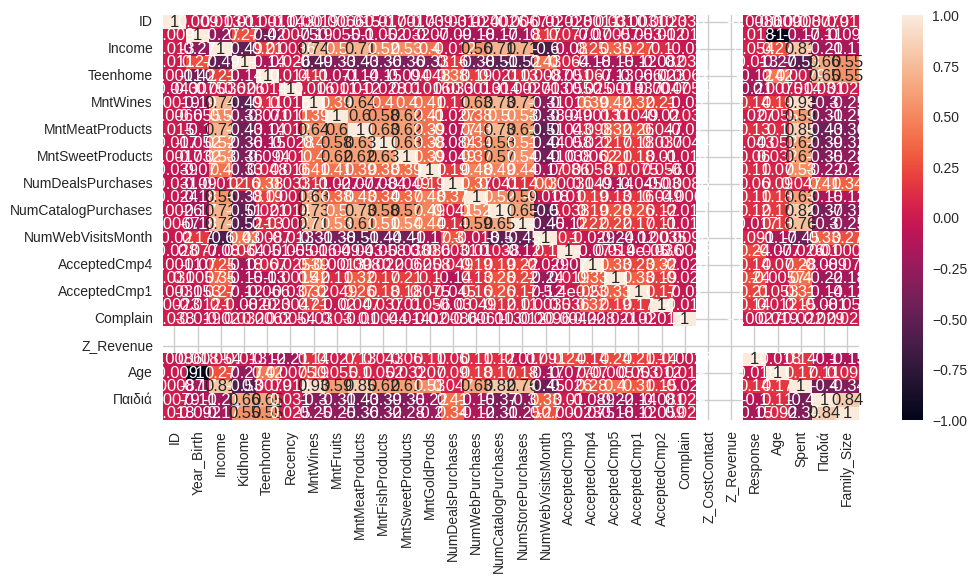

In [96]:
# Σε ένα νέο dataframe αποθηκεύουμε μόνο τα ακέραια χαρακτηριστικά 
df1 = df.select_dtypes(include = ['int64', 'float64'])

# Σχεδιασμός heatmap μεσω της seaborn βιβλιοθήκης
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)
print('')


###Ερώτημα 6: Απαντήσεις Ερωτημάτων με Γραφήματα

**6.1** $\ \ \ $ Παρατηρούμε ότι οι παντρεμένοι υπερτερούν "Married"

The prevailing category is: ['Married']


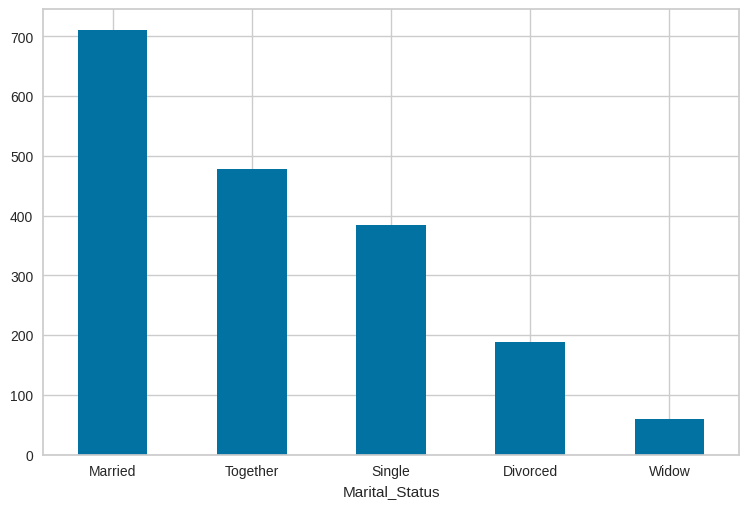

In [97]:
#6.1

percentages = df.value_counts('Marital_Status')    # Count how many are: 'Single', 'Together', 'Married', 'Divorced', 'Widow'

percentages.plot.bar(x='Marital_Status',rot=0)     

# find max element
AuxiliaryDictionary = percentages.to_dict() 

max_element = max(AuxiliaryDictionary.values())
prevailing_category = [statues for statues in AuxiliaryDictionary.keys() if AuxiliaryDictionary[statues] is max_element]

print(f"The prevailing category is: {prevailing_category}")

**6.2** $ \ \ \ $ Το πλήθος των πελατών που έχουν κάνει Complain είναι 19.

The number of customers complained: 19


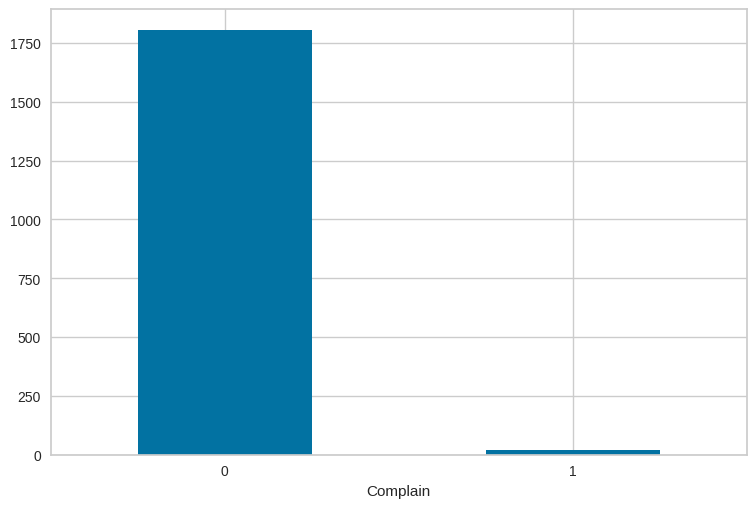

In [98]:
#6.2

percentages = df.value_counts('Complain')     # Count how many customers complained and how many didn't complain

percentages.plot.bar(x='Complain',rot=0) 

AuxiliaryDictionary = percentages.to_dict() 

if 1 in AuxiliaryDictionary.keys():
  print(f"The number of customers complained: {AuxiliaryDictionary[1]}")
else:
   print(f"The number of customers complained: 0")

**6.5** $ \ \ \ $ Παρατηρούμε ότι το μεγαλύτερο ποσό σε αγορές ξόδεψαν η 2η και η 3η ηλικία δηλαδή το εύρος των ηλικιών είναι '31-80'.

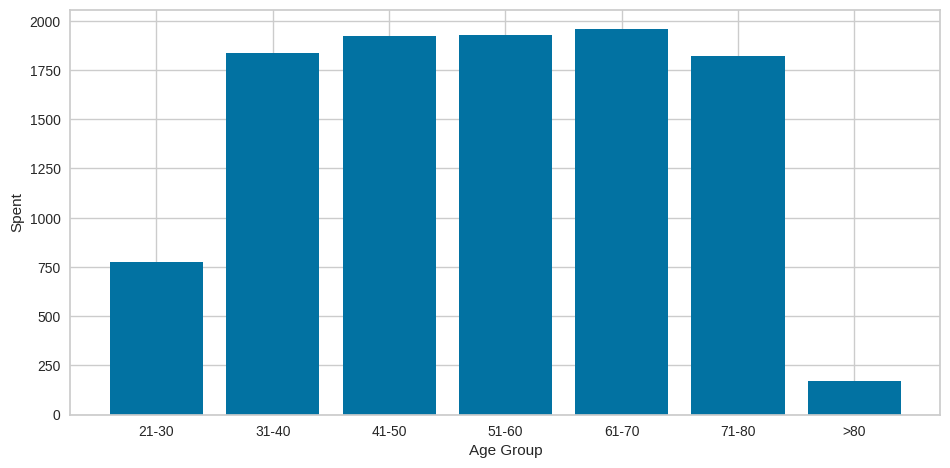

In [99]:
# 6.5
plt.figure(figsize=(10, 5))

plt.bar(sorted(df['Age Group']), df['Spent'])
plt.xlabel("Age Group")
plt.ylabel("Spent")
plt.show()


**6.10** $ \ \ \ $ Παρατηρούμε ότι οι πελάτες που ζουν μόνοι τους έχουν μεγαλύτερα εισοδήματα σε σχέση με αυτούς που συγκατοικούν.

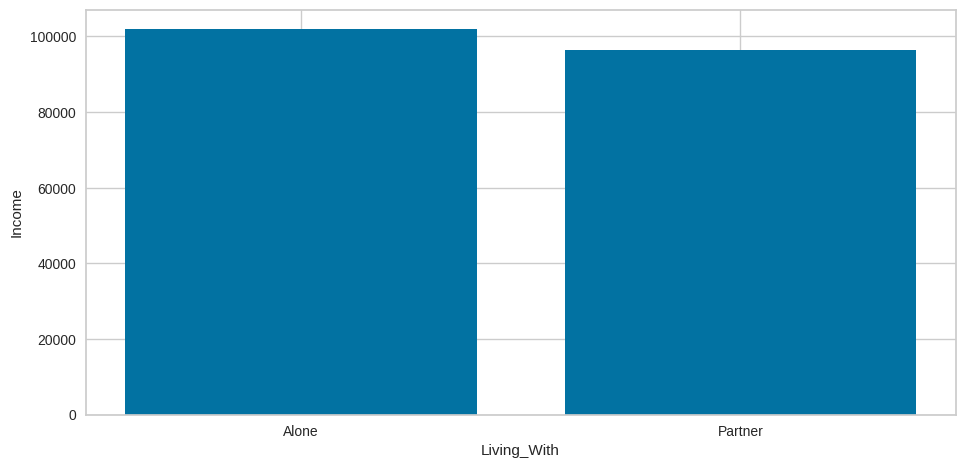

In [100]:
# 6.10
plt.figure(figsize=(10, 5))

plt.bar(df['Living_With'], df['Income'])
plt.xlabel("Living_With")
plt.ylabel("Income")
plt.show()

**6.12** $ \ \ \ $ Όσο μεγαλύτερη επισκεψιμότητα έχει η ιστοσελίδα του καταστήματος, τόσο μεγαλύτερες είναι και οι ηλεκτρονικές πωλήσεις στο 
$ \hspace{14mm} $ πλήθος. 

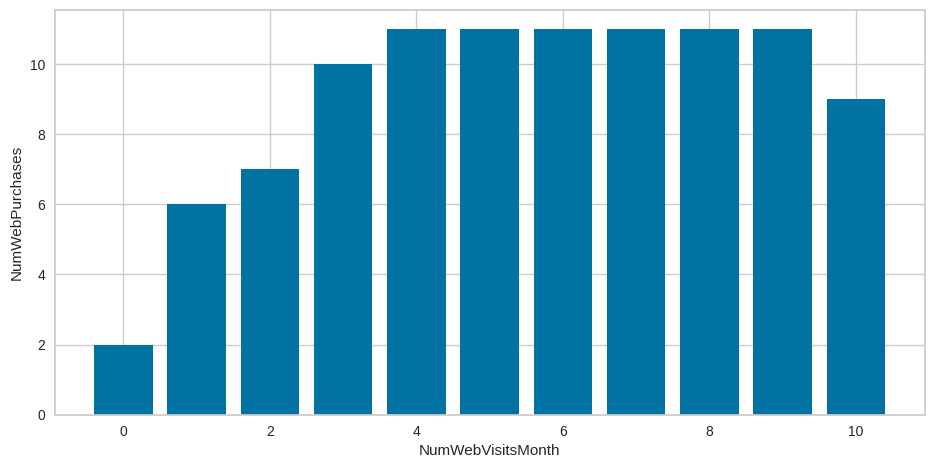

In [101]:
# 6.12

plt.figure(figsize=(10, 5))

plt.bar(df['NumWebVisitsMonth'], df['NumWebPurchases'])
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("NumWebPurchases")
plt.show()

**6.13** $ \ \ \ \ $ Το 0% των πολιτών αποδέχονται όλες τις προσφορές.

The percentage of customers accepting all offers is:


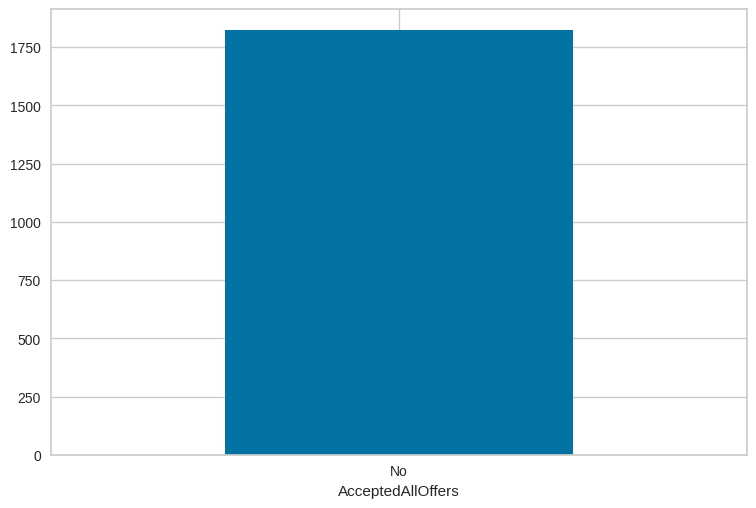

In [102]:
# 6.13

def Accepted_All_Offers(acceptedCmp1, acceptedCmp2, acceptedCmp3, acceptedCmp4, acceptedCmp5, response) :
  
  total = acceptedCmp1 + acceptedCmp2 + acceptedCmp3 + acceptedCmp4 + acceptedCmp5 + response
  if total == 6:
    return 'Yes'

  return 'No'

df2 = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].copy()
df2['AcceptedAllOffers'] = df.apply(lambda row: Accepted_All_Offers(row['AcceptedCmp1'], row['AcceptedCmp2'], row['AcceptedCmp3'], row['AcceptedCmp4'], row['AcceptedCmp5'], row['Response']), axis=1)


percentages = df2.value_counts('AcceptedAllOffers')     # Count how many customers complained and how many didn't complain 

percentages.plot.bar(x='AcceptedAllOffers', rot=0)

print(f"The percentage of customers accepting all offers is:")


**6.14** $ \ \ \ $ Ιστόγραμμα της στήλης 'NumDealsPurchases'.

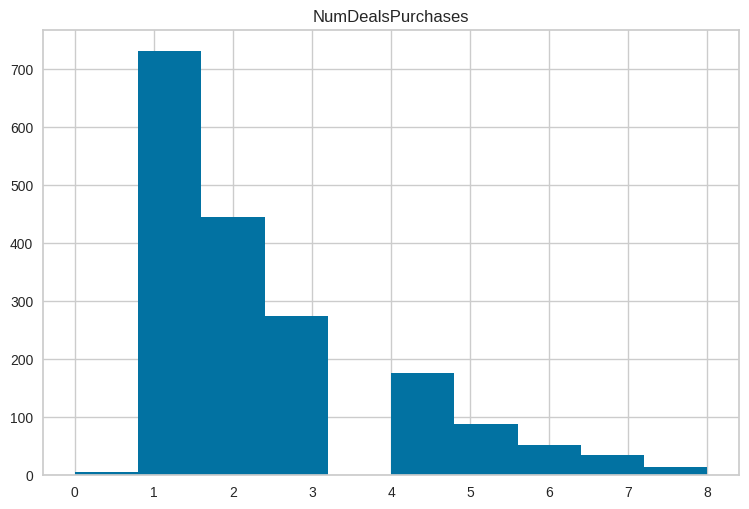

In [103]:
# 6.14

plt.hist(df['NumDealsPurchases'])
plt.title('NumDealsPurchases')
print(' ')

**6.15** $ \ \ \ $ Ιστόγραμμα της στήλης 'Income'.

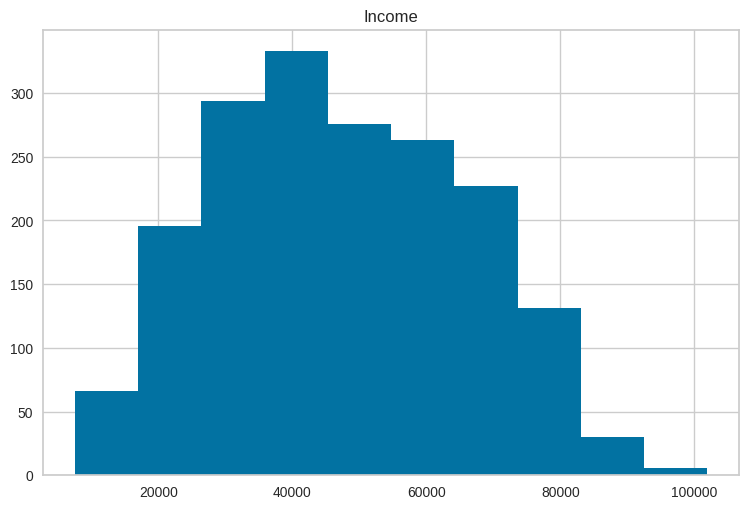

In [104]:
# 6.15

plt.hist(df['Income'])
plt.title('Income')
print(' ')

**6.16** $ \ \ \ $ Ιστόγραμμα της στήλης 'Kidhome'.

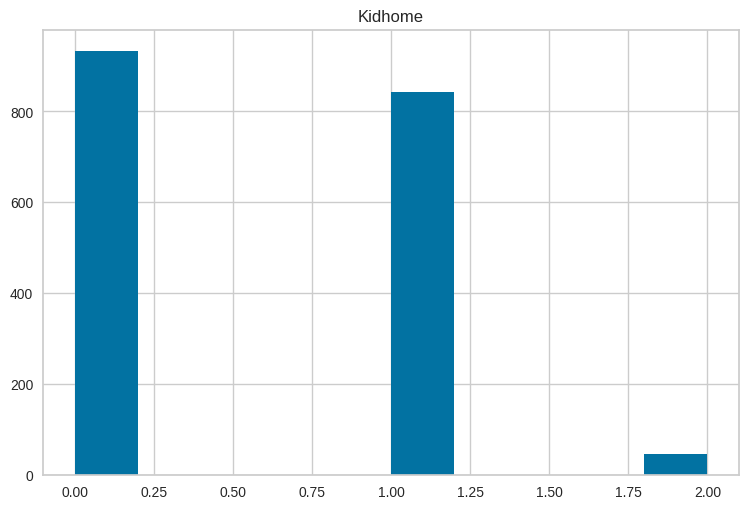

In [105]:
# 6.16

plt.hist(df['Kidhome'])
plt.title('Kidhome')
print(' ')

**6.17** $ \ \ \ $ Ιστόγραμμα της στήλης 'Family_Size'.

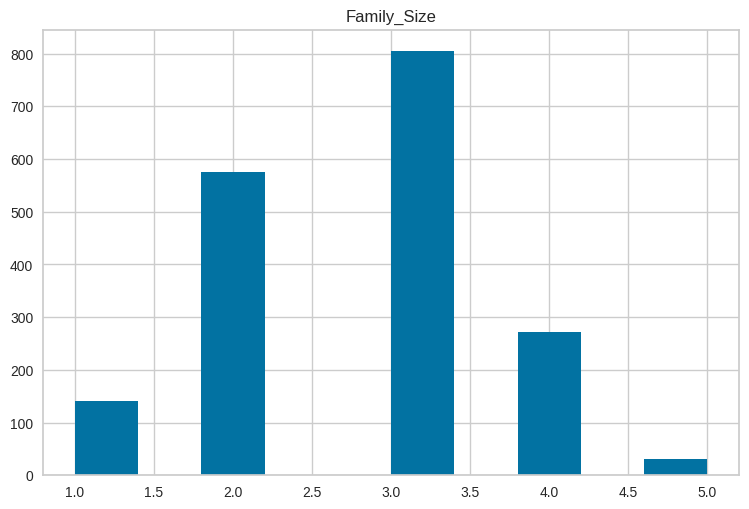

In [106]:
# 6.17

plt.hist(df['Family_Size'])
plt.title('Family_Size')
print(' ')

###Ερώτημα 7:  Principal component analysis (PCA)

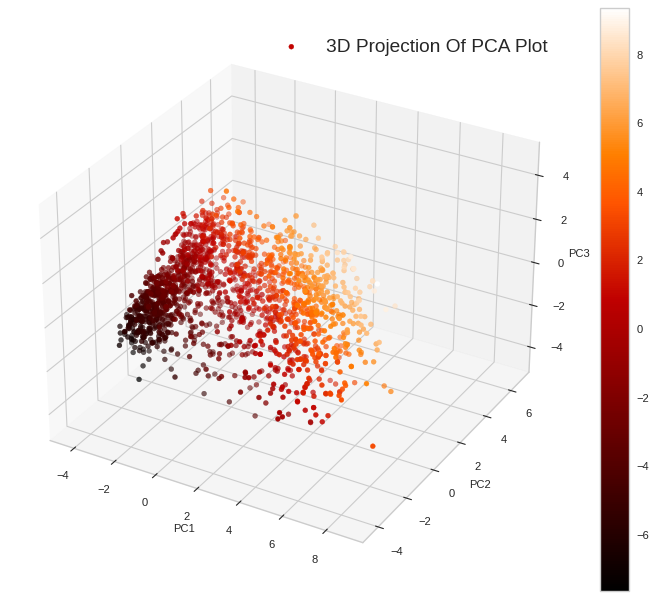

In [107]:
# 7η Άσκηση

# -----    Α.   Αρχικά επεξεργαζόμαστε τα δεδομένα.    -----

# Μετατροπή των 'Education', 'Marital_Status', 'Living_With' σε αριθμητικά δεδομένα
uncoded_columns = ['Education','Marital_Status','Living_With']
labelencoder = LabelEncoder()     # αρχικοποίηση LabelEncoder

for column in uncoded_columns:
  df[column] = labelencoder.fit_transform(df[column])   # εφαρμογή και μετασχηματισμός

# 1. Education:  2n Cycle: 0,  Basic: 1,  Graduation: 2,  Master: 3,  PhD: 4
# 2. Marital_Status: Divorced: 0,  Married: 1,  Single: 2, Together: 3,  Widow: 4 
# 3. Living_With: Alone: 0,  Partner: 1 

# Ακολουθεί η επιλογή των δεδομένων
# Δημιουργία αντίγραφου του dataframe df
numerics_items = ['int64','float64']
copydf = df.select_dtypes(include=numerics_items)

# Διαγραφή στηλών που σχετίζονται με προσφορές και προωθητικές ενέργειες
del copydf['AcceptedCmp3']
del copydf['AcceptedCmp4']
del copydf['AcceptedCmp5']
del copydf['AcceptedCmp1']
del copydf['AcceptedCmp2']
del copydf['Complain']
del copydf['Response']

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(copydf)


# -----    Β.   Μείσωση Διαστάσεων.    -----

# Χρήση της μέθοδου συμπίεσης Principal Component Analysis (PCA) για μείωση των διαστάσεων σε n_components=3
pca = PCA(n_components=3)
tpca = pca.fit_transform(scaled_features)  
PCAdf = pd.DataFrame(tpca, columns=['PC1', 'PC2', 'PC3'])

# -----    Γ.   Τρισδιάστατη προβολή του αποτελέσματος    -----

x = PCAdf['PC1']
y = PCAdf['PC2']
z = PCAdf['PC3']

fig = plt.figure(figsize=(10, 9), dpi=80)
ax = fig.add_subplot(111, projection='3d')

map_color = plt.get_cmap('gist_heat')
color = ax.scatter(x, y, z, c=(x + y + z), cmap = map_color )

plt.colorbar(color)
ax.set_xlabel("PC1", fontsize=10)
ax.set_ylabel("PC2", fontsize=10)
ax.set_zlabel("PC3", fontsize=10)
 
plt.legend(["3D Projection Of PCA Plot"], fontsize="x-large")
plt.show()
 

###Ερώτημα 8:  Υλοποίηση Συσταδοποίησης (Clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

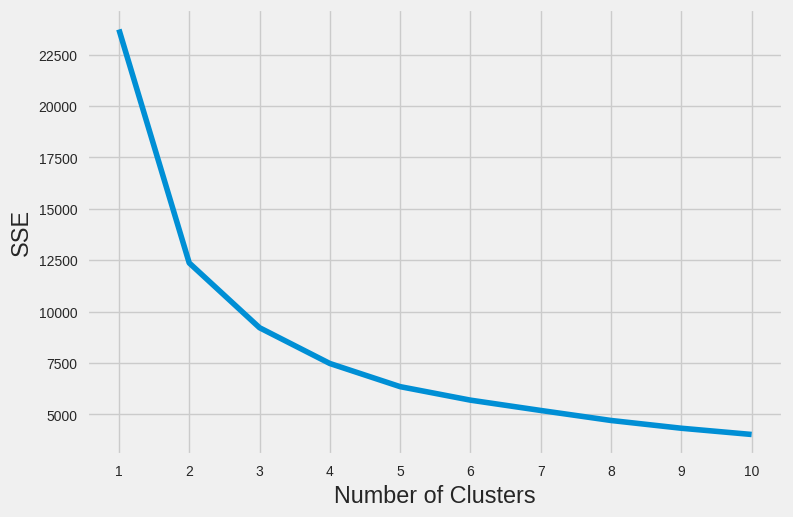

In [108]:
# 8η άσκηση

# Εύρεση του πλήθους των συστάδων που θα δημιουργηθούν, μέσω της μέθοδου Elbow
sse = []   # sse: άθροισμα των τετράγωνων του λάθους
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)     # αρχικοποίση του KMeans μοντέλου
  kmeans.fit(PCAdf)                 # προσαρμογή του KMeans μοντέλου
  sse.append(kmeans.inertia_)       

# Σχεδιασμό γραφήματος της μέθοδου Elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


Παρατηρούμε ότι από το παραπάνω γράφημα της μεθόδου Elbow, το πλήθος των συστάδων (clusters) που θα σχηματιστούν (εκεί που δείχνει ο αγκώνας) είναι 5.

Επομένως



*   Α. $\ \ \  $  Εφαρμογή ***Agglomerative*** μοντέλου στα δεδομένα.



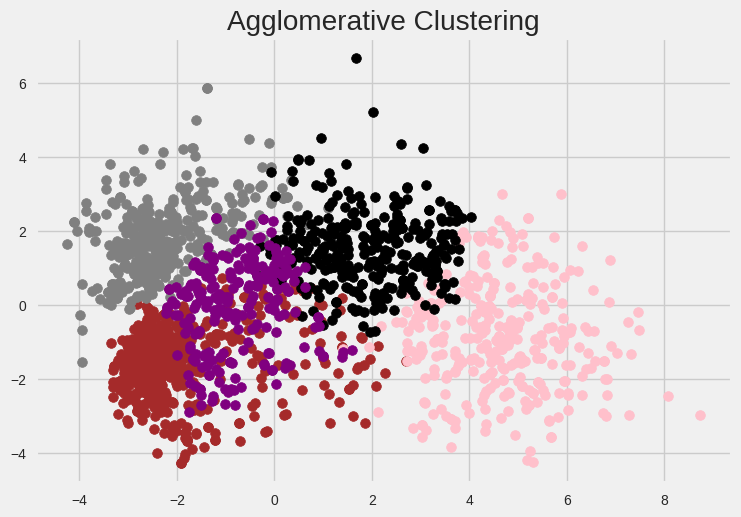

In [110]:
aclust = AgglomerativeClustering(n_clusters=5)  # αρχικοποίση του agglomerative μοντέλου
aggl = aclust.fit_predict(PCAdf)      # προσαρμογή του agglomerative μοντέλου και πρόβλεψη συστάδων

# Σχεδιάση των συστάδων σε γράφημα
PCAdf = np.array(PCAdf)
plt.scatter(PCAdf[aggl == 0, 0], PCAdf[aggl == 0, 1], c = 'brown', label = 'Cluster1')  # 1st cluster
plt.scatter(PCAdf[aggl == 1, 0], PCAdf[aggl == 1, 1], c = 'pink', label = 'Cluster2')   # 2nd cluster
plt.scatter(PCAdf[aggl == 2, 0], PCAdf[aggl == 2, 1], c = 'gray', label = 'Cluster3')   # 3rd cluster
plt.scatter(PCAdf[aggl == 3, 0], PCAdf[aggl == 3, 1], c = 'black', label = 'Cluster4')  # 4th cluster
plt.scatter(PCAdf[aggl == 4, 0], PCAdf[aggl == 4, 1], c = 'purple', label = 'Cluster5') # 5th cluster

plt.title('Agglomerative Clustering')
plt.show()


*   Β. $\ \ \  $  Εφαρμογή ***K-means*** μοντέλου στα δεδομένα.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


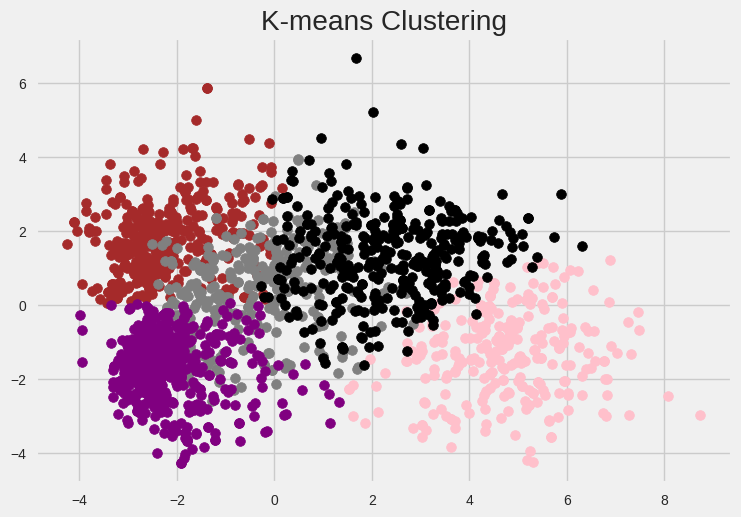

In [111]:
kclust =  KMeans(n_clusters=5)    # αρχικοποίση του K-means μοντέλου
km = kclust.fit_predict(PCAdf)    # προσαρμογή του K-means μοντέλου και πρόβλεψη συστάδων

# Σχεδιάση των συστάδων σε γράφημα
PCAdf = np.array(PCAdf)
plt.scatter(PCAdf[km == 0, 0], PCAdf[km == 0, 1], c = 'brown', label = 'Cluster1')  # 1st cluster
plt.scatter(PCAdf[km == 1, 0], PCAdf[km == 1, 1], c = 'pink', label = 'Cluster2')   # 2nd cluster
plt.scatter(PCAdf[km == 2, 0], PCAdf[km == 2, 1], c = 'gray', label = 'Cluster3')   # 3rd cluster
plt.scatter(PCAdf[km == 3, 0], PCAdf[km == 3, 1], c = 'black', label = 'Cluster4')  # 4th cluster
plt.scatter(PCAdf[km == 4, 0], PCAdf[km == 4, 1], c = 'purple', label = 'Cluster5') # 5th cluster

plt.title('K-means Clustering')
plt.show()


###Ερώτημα 9:  Προφίλ των πελατών (bonus)

Για την εύρεση των προφίλ των πελατών, θα χρησιμοποιήσουμε το αποτέλεσμα των clusters του αλγορίθμου συσταδοποίησης Agglomerative.

In [112]:
copydf['Clusters'] = aggl     # αποθήκευση των clusters που βρέθηκαν από τον αλγόριθμο Agglomerative

Οι πληροφορίες που εξάγουμε από τις 5 συστάδες για την σκιαγράφηση των προφίλ των πελατών, με την βοήθεια των παρακάτω γραφημάτων, είναι οι εξής: 

$ $

**Cluster 0:**
$ $

Οι πελάτες αυτής της ομάδας

*   έχουν κυρίως χαμηλό εισόδημα ~(5000 – 50000)
*   ξοδεύουν λιγότερα λεφτά σε αγορές ~(0 - 750)
*   η οικογένειά τους αποτελείται από 2 άτομα είτε συγκατοικούν με κάποιον,     είτε έχουν ένα παιδί (δηλαδή είναι μονογονεϊκή οικογένεια)
*   το εύρος ηλικίας στην οποία ανήκουν είναι  ~(25 – 50) 
*   το μεγαλύτερο ποσοστό αυτή της ομάδας έχουν “Basic” ή “2n-Cycle” εκπαίδευση
*   προτιμούν τις ηλεκτρονικές αγορές
*   αγοράζουν κυρίως κρασί και κρέας

$ $

**Cluster 1:**
$ $

Οι πελάτες αυτής της ομάδας

*   έχουν υψηλό εισόδημα ~(50000 – 95000)
*   ξοδεύουν πολλά λεφτά σε αγορές ~ (500 – 1900)
*   οι περισσότεροι δεν έχουν παιδιά
*   κυρίως ζουν μόνοι 
*   δεν έχουν ιδιαίτερη προτίμηση στον τρόπο αγορών, αγοράζουν με όλους τους τρόπους (μέσω της ιστοσελίδας, του καταστήματος και του καταλόγου) 
*   αγοράζουν όλα τα προϊόντα

$ $

**Cluster 2:**
$ $

*   έχουν βασικό εισόδημα ~(20000 – 60000)
*   δεν χαλάνε πολλά λεφτά σε αγορές
*   οι περισσότεροι είτε έχουν 2 παιδιά είτε έχουν 3
*   έχουν τουλάχιστον 2 έφηβος και το πολύ 3 εφήβους
*   το εύρος ηλικίας στην οποία ανήκουν είναι ~(45 – 75) 
*   κυνηγάνε τις προσφορές
*   αγοράζουν κυρίως κρασί

$ $

**Cluster 3:**
$ $


*   έχουν μεσαίο εισόδημα ~(40000 – 80000)
*   ξοδεύουν πολλά χρήματα σε αγορές ~(400 – 1500), αλλά όχι υπερβολικά
*   οι περισσότεροι έχουν ένα παιδί 
*   έχουν τουλάχιστον έναν έφηβο 
*   είναι συνήθως άνω των 55 ετών
*   αγοράζουν κυρίως κρασί 

$ $

**Cluster 4:**
$ $

*   έχουν βασικό εισόδημα ~(20000 – 65000)
*   δε ξοδεύουν αρκετά ~(0 – 600)
*   δεν έχουν κυρίως παιδιά 
*   το εύρος ηλικίας είναι κυρίως ’50-70’
*   αγοράζουν κυρίως κρασί






**Συμπέρασμα:** $ \ \ \ $ Οι πιο συμαντικοί πελάτες είναι εκείνοι που βρίσκονται στην συστάδα 1 (cluster 1), διότι ξοδεύουν περισσότερα λεφτά σε σχέση με τους πελάτες των υπόλοιπων 4 συστάδων.Περισσότερη προσοχή θέλουν οι πελάτες του cluster 2, καθώς έχουν μεγαλύτερες ανάγκες, λόγω των πολλών ατόμων της οικογένειας και του βασικού εισοδήματος, γι' αυτό κυνηγάνε τις προσφορές. Τέλος σημαντικό είναι να αναφέρουμε,  ότι τα περισσότερα χρήματα που ξοδεύουν οι πελάτες όλων των συστάδων είναι στην αγορά κρασιού.

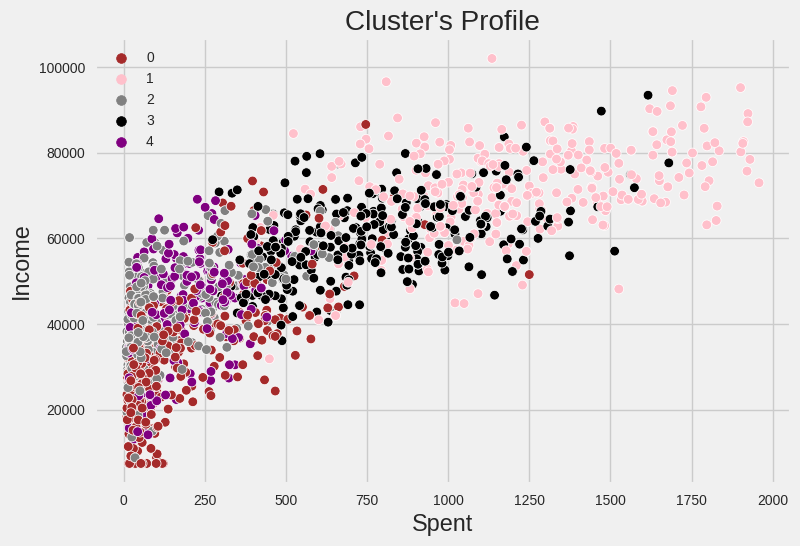

In [113]:
pl = sns.scatterplot(x = copydf["Spent"], y = copydf["Income"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

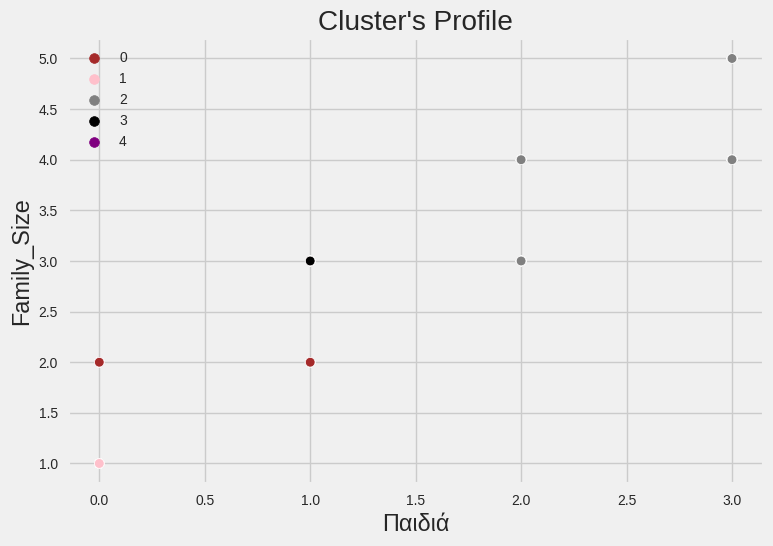

In [114]:
pl = sns.scatterplot(x = copydf["Παιδιά"], y = copydf["Family_Size"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

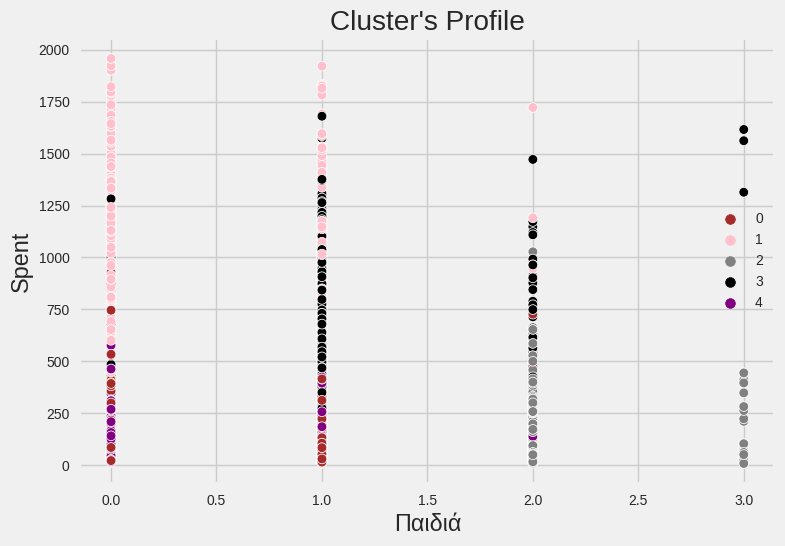

In [115]:
pl = sns.scatterplot(x = copydf["Παιδιά"], y = copydf["Spent"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

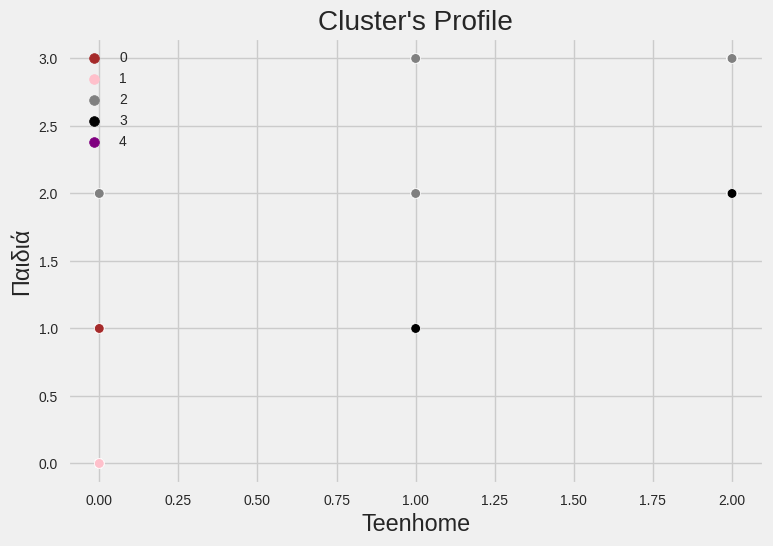

In [116]:
pl = sns.scatterplot(x = copydf["Teenhome"], y = copydf["Παιδιά"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

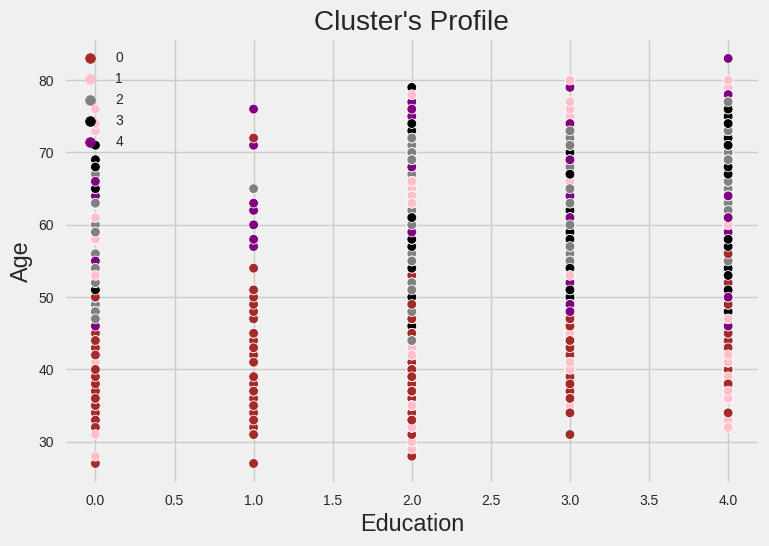

In [117]:
pl = sns.scatterplot(x = copydf["Education"], y = copydf["Age"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

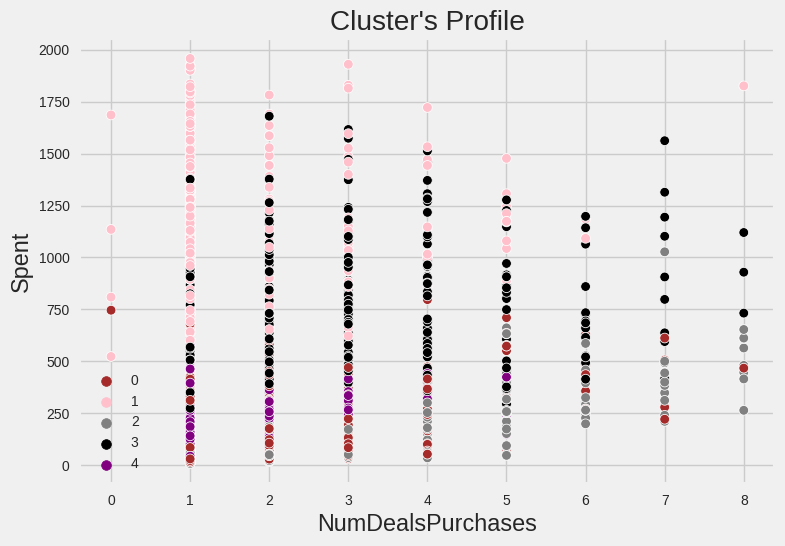

In [118]:
pl = sns.scatterplot(x = copydf["NumDealsPurchases"], y = copydf["Spent"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

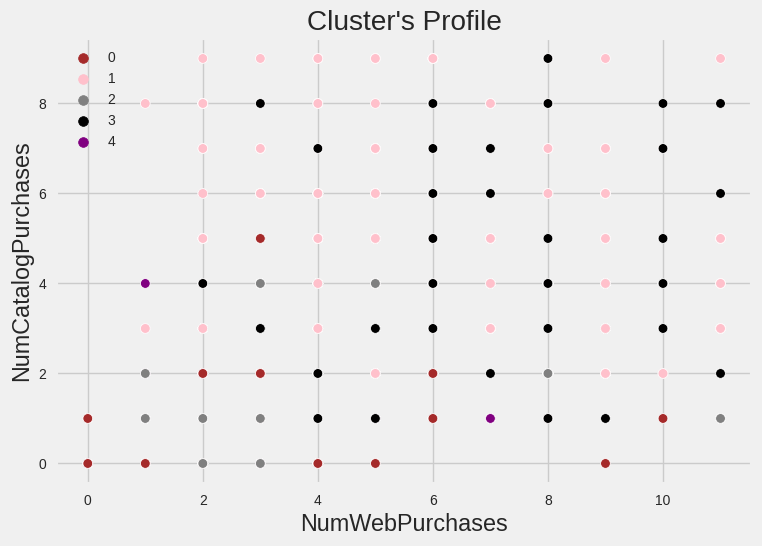

In [119]:
pl = sns.scatterplot(x = copydf["NumWebPurchases"], y = copydf["NumCatalogPurchases"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

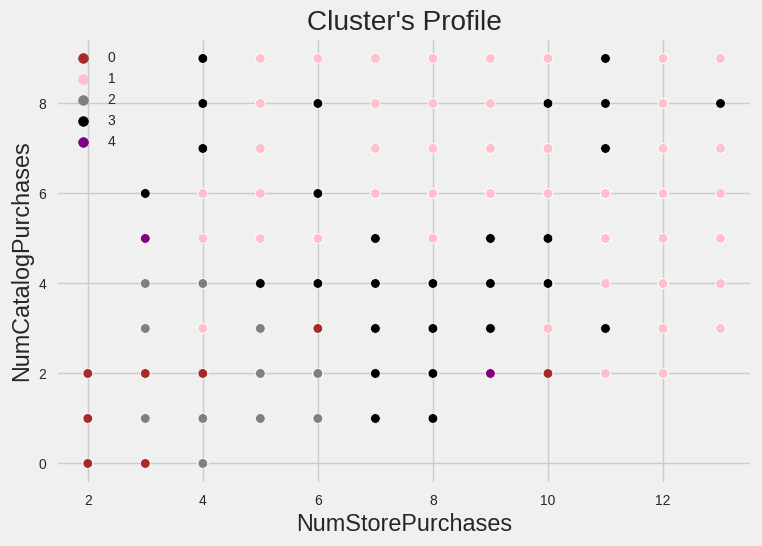

In [120]:
pl = sns.scatterplot(x = copydf["NumStorePurchases"], y = copydf["NumCatalogPurchases"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

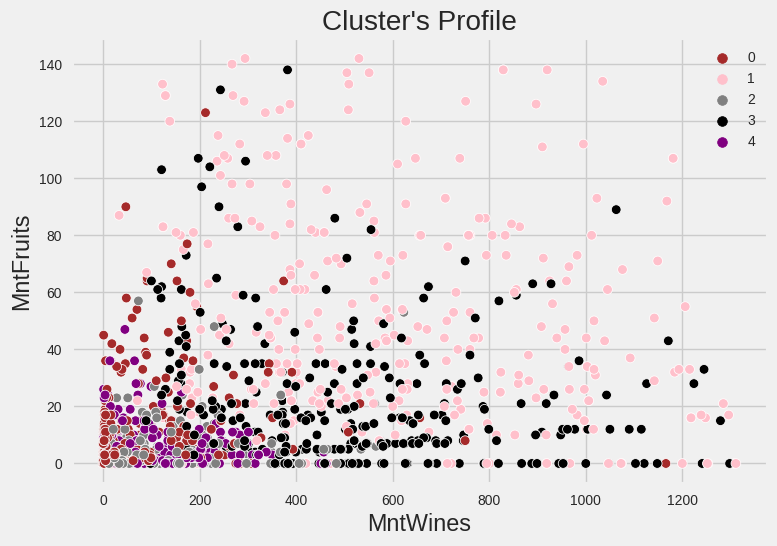

In [121]:
pl = sns.scatterplot(x = copydf["MntWines"], y = copydf["MntFruits"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

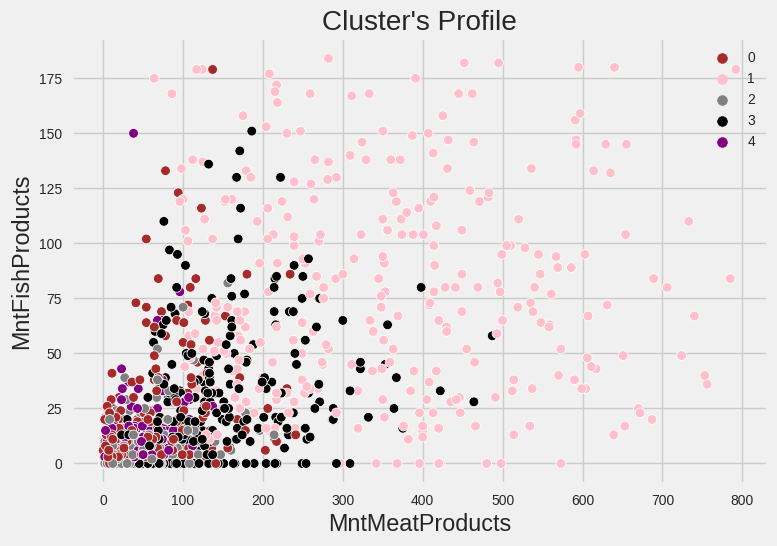

In [122]:
pl = sns.scatterplot(x = copydf["MntMeatProducts"], y = copydf["MntFishProducts"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()

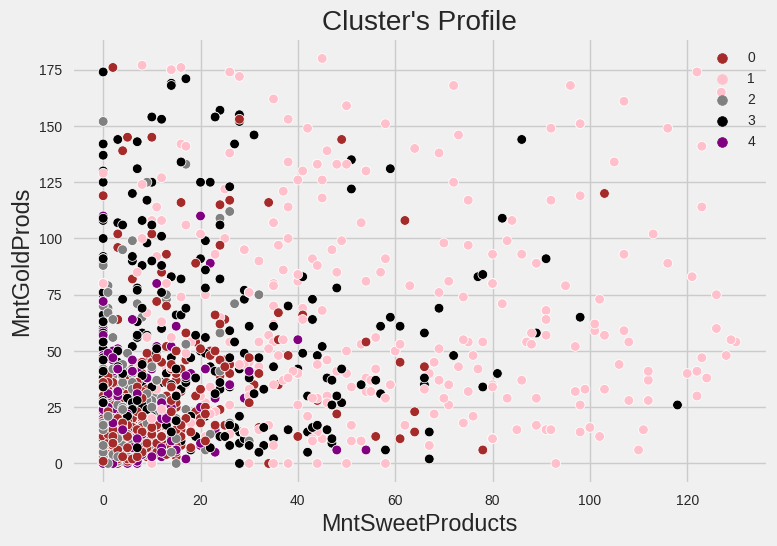

In [123]:
pl = sns.scatterplot(x = copydf["MntSweetProducts"], y = copydf["MntGoldProds"], hue = copydf["Clusters"], palette = ['brown', 'pink', 'gray', 'black', 'purple'])
pl.set_title("Cluster's Profile")
plt.legend()
plt.show()